# **WS3**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('titanic.csv',delimiter=';')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# drop des ages manquant

In [6]:
df.dropna(subset=['age'], inplace=True)
df.age = df.age.astype(int)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON


# passage en booleen du sex (0,1)

In [7]:
df.sex =df.sex.map({'male':0,'female':1})
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,1,29,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,0,0,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,1,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,0,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),1,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON


In [8]:
df['cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
         ...   
1301        NaN
1304        NaN
1306        NaN
1307        NaN
1308        NaN
Name: cabin, Length: 1046, dtype: object>

In [12]:
df.drop(['name','ticket','cabin'],axis=1,inplace=True)

In [14]:
df.describe()

,pclass,survived,sex,age,sibsp,parch,fare,body
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000,120.00000
mean,2.207457,0.408222,0.370937,29.857553,0.502868,0.42065,36.686080,160.87500
std,0.841497,0.491740,0.483287,14.426974,0.912167,0.83975,55.732533,98.10392
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000
25%,1.000000,0.000000,0.000000,21.000000,0.000000,0.00000,8.050000,71.50000
50%,2.000000,0.000000,0.000000,28.000000,0.000000,0.00000,15.750000,155.50000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,1.00000,35.500000,256.50000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.00000,512.329200,328.00000


In [16]:
import matplotlib.pyplot as plt


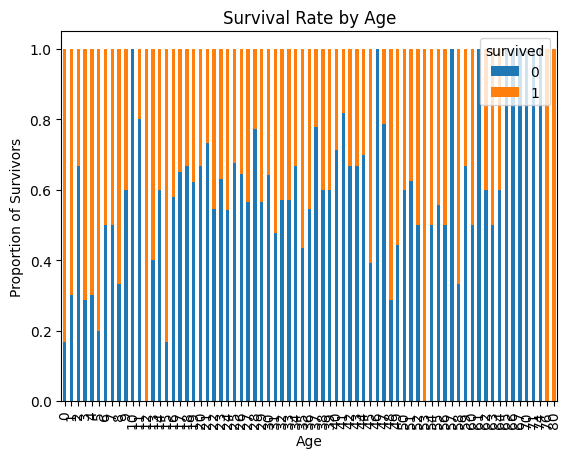

In [17]:
table= pd.crosstab(df.age,df.survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Survivors')
plt.show()

In [21]:
df['age_group'] = pd.cut(df['age'], 5)
df[['age_group', 'survived']].groupby(['age_group'], as_index=False).mean().sort_values(by='age_group', ascending=True)

C:\Users\victorien.sauvonnet\AppData\Local\Temp\ipykernel_12488\3803439371.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['age_group', 'survived']].groupby(['age_group'], as_index=False).mean().sort_values(by='age_group', ascending=True)


,age_group,survived
0,"(-0.08, 16.0]",0.552239
1,"(16.0, 32.0]",0.375000
2,"(32.0, 48.0]",0.400000
3,"(48.0, 64.0]",0.443396
4,"(64.0, 80.0]",0.153846


In [22]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,age_group
0,1,1,1,29,0,0,211.3375,S,2,NaN,St Louis. MO,"(16.0, 32.0]"
1,1,1,0,0,1,2,151.5500,S,11,NaN,Montreal. PQ / Chesterville. ON,"(-0.08, 16.0]"
2,1,0,1,2,1,2,151.5500,S,NaN,NaN,Montreal. PQ / Chesterville. ON,"(-0.08, 16.0]"
3,1,0,0,30,1,2,151.5500,S,NaN,135.0,Montreal. PQ / Chesterville. ON,"(16.0, 32.0]"
4,1,0,1,25,1,2,151.5500,S,NaN,NaN,Montreal. PQ / Chesterville. ON,"(16.0, 32.0]"


In [23]:
df.loc[df['age'] <= 16, 'age'] = 0
df.loc[(df['age'] > 16) & (df['age'] <= 32), 'age'] = 1
df.loc[(df['age'] > 32) & (df['age'] <= 48), 'age'] = 2
df.loc[(df['age'] > 48) & (df['age'] <= 64), 'age'] = 3
df.loc[df['age'] > 64, 'age'] = 4   
df.drop(['age_group'], axis=1, inplace=True)
df.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1,1,1,1,0,0,211.3375,S,2,NaN,St Louis. MO
1,1,1,0,0,1,2,151.5500,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,1,0,1,2,151.5500,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,0,1,1,2,151.5500,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,1,1,1,2,151.5500,S,NaN,NaN,Montreal. PQ / Chesterville. ON


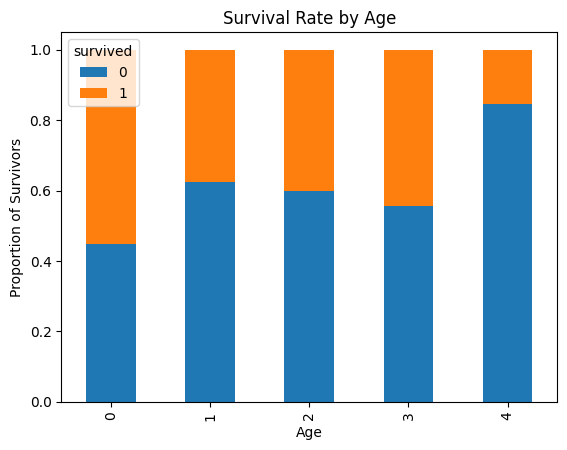

In [24]:
table= pd.crosstab(df.age,df.survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Survivors')
plt.show()

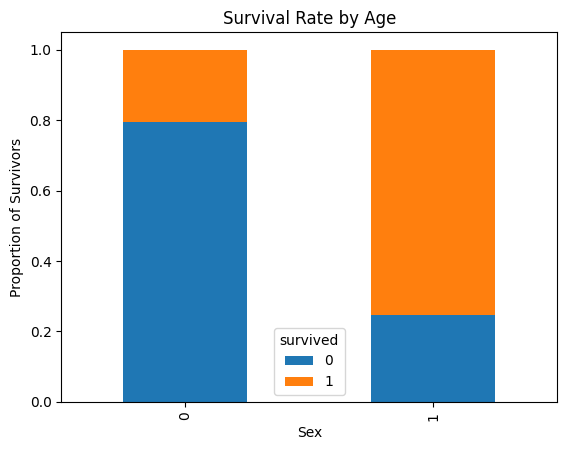

In [25]:
table= pd.crosstab(df.sex,df.survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Survival Rate by Age')
plt.xlabel('Sex')
plt.ylabel('Proportion of Survivors')
plt.show()